<a href="https://colab.research.google.com/github/grodriguez1123/Metodos1_AndreaRocha_GabrielaRodriguez/blob/main/Parcial_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andrea Rocha Barajas 202311471

Gabriela Rodriguez 202320229

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as spo
from scipy import stats
from scipy.stats import mode
from scipy.stats import exponweib
from scipy.optimize import curve_fit
from IPython.display import clear_output
import emcee
import corner
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [116]:
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

#Problema 2 (Cadena de producción)

a. Describa las variables observables del problema


Las variables observables son la presencia o ausencia del producto en cada estación.

b. Defina el conjunto de estados S={S1,S2,S3}

S1​
 : El producto está en la estación de producción. Incluye los casos en los que el producto tiene un defecto y no avanza a la estación de empaque.

S2: El producto está en la estación de empaque. El producto ha avanzado desde la estación de producción, pero aún no ha sido enviado al mercado.

S3 : El producto es enviado al mercado. El producto ha sido procesado correctamente y ha completado el ciclo de producción y empaque.

c. Construya la matriz de transición de este proceso estocástico

In [117]:
T= np.array([[0.1,0.9,0.],\
              [0.,0.05,0.95],\
              [0.,0.,1.]])


d. Encuentre el estado estable tanto algebraicamente como numéricamente.  Recuerde πP=π para el estado estable.  ¿Qué interpretación le da al estado estable

In [118]:
states=np.linalg.matrix_power(T,15)
states

array([[1.00000000e-15, 1.79994507e-14, 1.00000000e+00],
       [0.00000000e+00, 3.05175781e-20, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [119]:
Initial = np.array([1.,0.,0.])
estable=np.dot(Initial,states)
estable

array([1.00000000e-15, 1.79994507e-14, 1.00000000e+00])

e. Determine la probabilidad en estado estable de que ambas estaciones estén ocupada sal mismo tiempo

In [120]:
prob_ambas= estable[0] * estable[1]
print(prob_ambas)

1.7999450683593806e-29


f. Determine  la  probabilidad  en  estado  estable  de  que  al  menos  una  estación  esté ocupada

In [121]:
prob_una = estable[0] + estable[1]
print(prob_una)

1.8999450683593778e-14


g. Determine la probabilidad en estado estable de que la estación de producción esté vacía

In [122]:
prob_vacia = 1 - estable[0]
print(prob_vacia)

0.999999999999999


#Problema 3 (Cadena de producción con devolución de producto)

Resuelva  el  problema  anterior  suponiendo  que  el  2%  de  la  veces  el  cliente  regresa  el producto y va directamente a producción.

P(S1∩S2)  =  0.043%, P(S1∪S2)  =  4.15% y P(⌝S1)  =  97.87%.   El  estado  estable  es π= [0.0213,0.0202,0.9585]

a. Describa las variables observables del problema

Las variables observables del problema son las mismas que las del punto anterior.

b. Defina el conjunto de estados S={S1,S2,S3}

S1​
 : El producto está en la estación de producción. Incluye los casos en los que el producto tiene un defecto y no avanza a la estación de empaque.

S2: El producto está en la estación de empaque. El producto ha avanzado desde la estación de producción, pero aún no ha sido enviado al mercado.

S3 : El producto es enviado al mercado. El producto ha sido procesado correctamente y ha completado el ciclo de producción y empaque.

c. Construya la matriz de transición de este proceso estocástico

In [123]:
T= np.array([[0.1,0.9,0.],\
              [0.,0.05,0.95],\
              [0.02,0.,0.98]])

d. Encuentre el estado estable tanto algebraicamente como numéricamente. Recuerde πP=π para el estado estable. ¿Qué interpretación le da al estado estable

In [124]:
states=np.linalg.matrix_power(T,15)
states

array([[0.02130045, 0.02017937, 0.95852018],
       [0.02130045, 0.02017937, 0.95852018],
       [0.02130045, 0.02017937, 0.95852018]])

In [125]:
Initial = np.array([1.,0.,0.])
estable=np.dot(Initial,states)
estable

array([0.02130045, 0.02017937, 0.95852018])

e. Determine la probabilidad en estado estable de que ambas estaciones estén ocupada sal mismo tiempo

In [126]:
prob_ambas= estable[0] * estable[1]
print(prob_ambas)

0.0004298296767990605


f. Determine  la  probabilidad  en  estado  estable  de  que  al  menos  una  estación  esté ocupada

In [127]:
prob_una = estable[0] + estable[1]
print(prob_una)

0.041479820625469344


g. Determine la probabilidad en estado estable de que la estación de producción esté vacía

In [128]:
prob_vacia = 1 - estable[0]
print(prob_vacia)

0.9786995515697233


#Problema 1: Casino tramposo

a. Use la siguiente distribución de probabilidad a-priori π= [0.2,0.8] para la moneda justa y sesgada

In [129]:
# Definimos estados y priors
States = np.array([0,1])
Prior = np.array([0.2,0.8])

b. Encuentre la secuencia oculta más probable del tipo de moneda que se eligió en cada lanzamiento y su respectiva probabilidad

In [130]:
# Definimos matrices de emisión y transmision
T = np.array([[0.8,0.2],[0.2,0.8]]) #En orden: justa y sesgada

E = np.array([[0.5,0.9],[0.5,0.1]])

In [131]:
DictH = {0:'Justa',1:'Sesgada'}
DictO = {0:'Cara',1:'Sello'}
Obs = np.array([1,0,0,0,1,0,1,0])

In [132]:
def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))

    Permu = []

    for it in CStates:
      p = list(permutations(it,N))
     # print(p)
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates

In [133]:
HiddenStates = GetStates(States,8)
HiddenStates

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [134]:
def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.
  # Probabilidad a priori
  p *= Prior[ State[0] ]

  for i in range(n-1): # El ultimo no va a ningun lado
    p *= T[ State[i+1], State[i] ]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p

In [135]:
P = np.zeros(HiddenStates.shape[0])

for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

ii = np.where( P == np.max(P) )
print(HiddenStates[ii],P[ii])

valores_hidden = HiddenStates[ii][0]
resultado = [DictH[val] for val in valores_hidden]
print(resultado)

[[1 1 1 1 0 0 0 0]] [0.0001911]
['Sesgada', 'Sesgada', 'Sesgada', 'Sesgada', 'Justa', 'Justa', 'Justa', 'Justa']


c. Dado el estado observado ΩO, determine el conjunto de secuencias ocultas mas probables hasta alcanzar una probabilidad acumulada del 20%.
Utilice Pandas para organizar los datos de la siguiente manera:

i. En la primera columna, incluya cada secuencia.

ii. En la segunda columna, registre la probabilidad de cada secuencia.

iii. Ordene elDataFramepor probabilidad en orden descendente.

iv. En una tercera columna, calcule la probabilidad acumulada.El c ́odigo debe imprimir el conjunto de secuencias m ́as probables que sumen unaprobabilidad acumulada del 20%.

Nota:Recuerde que la suma de probabilidades no es igual a 1 porque ya se haobservado una secuencia ΩO. Por lo tanto, es necesario normalizar las probabilidadesocultas usando probabilidad condicional para garantizar su correcta interpretación.

In [136]:
# Normalizar las probabilidades
P_total = sum(P)
P_normal = [p / P_total for p in P]

#Crear el data frame
data = {'Estados Ocultos': list(HiddenStates),'Probabilidad': P_normal}
df = pd.DataFrame(data)

#Ordenar de forma descendente
df = df.sort_values(by='Probabilidad', ascending=False)

#Probabilidad acumulada
df['Probabilidad Acumulada'] = df['Probabilidad'].cumsum()

# Seleccionar las secuencias hasta alcanzar el 20% acumulado
maximo = 0.2
result = df[df['Probabilidad Acumulada'] <= maximo]
print("Conjunto de secuencias más probables que sumen una probabilidad acumulada del 20%:")
print(result)

Conjunto de secuencias más probables que sumen una probabilidad acumulada del 20%:
              Estados Ocultos  Probabilidad  Probabilidad Acumulada
162  [1, 1, 1, 1, 0, 0, 0, 0]      0.098790                0.098790
0    [0, 0, 0, 0, 0, 0, 0, 0]      0.084696                0.183486


d. Dibuje las probabilidades ocultas asociadas al estado observable ΩO

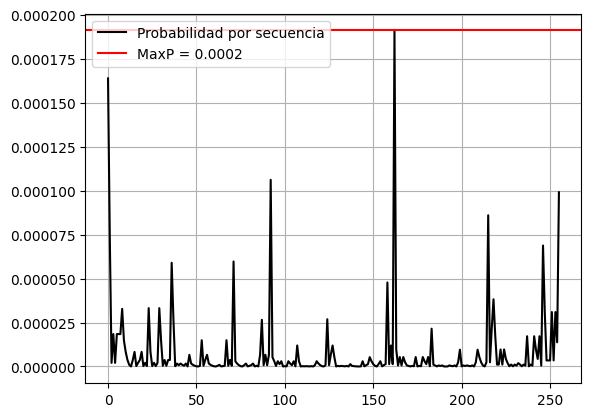

In [137]:
MaxP = P[ii]

fig, ax = plt.subplots()
ax.grid(True)
plt.plot(P,label = 'Probabilidad por secuencia',color = 'k')
plt.axhline(y=MaxP, color='r', label= 'MaxP = 0.0002')
plt.legend()
plt.show()

e. Calcule las probabilidades de cada estado observable ΩO como la suma de las probabilidades de todos los estados ocultos

In [138]:
ObsStates = GetStates([0,1],8)

Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):

  dim = HiddenStates.shape[0]
  P = np.zeros(dim)

  for i in range(dim):
    P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)

  PObs[j] = np.sum(P)

PObs

array([0.13698241, 0.04114921, 0.0347373 , 0.03175272, 0.03026766,
       0.02932288, 0.02830811, 0.02656789, 0.02297818, 0.01870516,
       0.01330002, 0.01467809, 0.01079433, 0.01067359, 0.01276253,
       0.00956961, 0.00877661, 0.00936674, 0.01172117, 0.00883478,
       0.00776184, 0.00767971, 0.00853533, 0.01088136, 0.00811519,
       0.00697382, 0.00661175, 0.00679511, 0.00764233, 0.00970066,
       0.00694603, 0.00590355, 0.00547305, 0.00537647, 0.00555143,
       0.00611094, 0.0074164 , 0.00955193, 0.00649319, 0.00616157,
       0.00733671, 0.00505945, 0.00428819, 0.00497251, 0.00456283,
       0.0048075 , 0.00623446, 0.00432462, 0.00337544, 0.00382959,
       0.00321043, 0.00330316, 0.00416108, 0.00372302, 0.00355961,
       0.00405611, 0.00553322, 0.00381405, 0.00283376, 0.00316972,
       0.00249084, 0.00251514, 0.00309313, 0.00256378, 0.00241017,
       0.0026765 , 0.00353481, 0.00309969, 0.00278698, 0.0028754 ,
       0.00342205, 0.00478004, 0.00319794, 0.00231328, 0.00256

f. Verifique que la suma de todos los estados observables es 1

In [140]:
np.sum(PObs)

1.0000000000000007

g. ¿El resultado depende de la probabilidad a-priori? Explique conceptualmente su respuesta

La probabilidad a priori si afecta el cálculo de la probabilidad total de una secuencia y su camino más probable. Lo cual se debe a que la probabilidad a priori refleja la creencia inicial sobre cómo comienza el sistema entre los posibles estados antes de observar cualquier dato.

Si no se especifica, generalmente se asume una distribución uniforme, es decir, P(J)=0.5 y P(B)=0.5. Sin embargo, si asignamos valores diferentes, esto puede alterar los resultados al dar mayor peso a un estado inicial sobre otro. Por ejemplo, si se asigna P(J)=0.8 y P(B)=0.2, estaremos inclinando el modelo a preferir caminos que comiencen en J, afectando tanto las probabilidades calculadas como la secuencia oculta más probable.

Luego, la probabilidad a priori actúa como un factor que sesga nuestras predicciones iniciales y, por lo tanto, influye en los resultados finales.

h. Considere que las matrices de transición y emisión están correctamente definidas. Si tuviera que estimar las probabilidades de transición y emisión utilizando técnicas deaprendizaje automático, ¿qué enfoque metodológico basado en datos propondrıa?

Para estimar las probabilidades de transición y emisión en el escenario de las dos monedas (una justa y una sesgada), usando técnicas de aprendizaje automatico, usaría un enfoque redes neuronales.

La entrada a la red será una secuencia de lanzamientos de caras y sellos, donde cada lanzamiento será representado mediante codificación one-hot: "C" se representa como [1, 0] y "S" como [0, 1]. Un vector one-hot es una forma de representación de datos que se usa en el procesamiento de información, especialmente en el contexto de redes neuronales y aprendizaje automático. Este tipo de vector es una representación binaria, donde un valor específico (generalmente asociado a una categoría) se marca con un 1, y todos los demás valores se marcan con 0. Se haría uso de este tipo de entrada dado que los datos que nos interesa evaluar son categóricos. Al uso de vectores one-hot también hace que el proceso de aprendizaje sea más sencillo para la red neuronal. Cada entrada es única y separada de las demás, lo que ayuda a la red a aprender patrones en las relaciones entre las entradas y las salidas sin la confusión de jerarquías numéricas.

La red neuronal contará con dos capas ocultas, en las cuales cada una tendría un número entre 32 y 64 neuronas (lo cuál es un tamaño recurrente entre sistemas de este claibre) y activación ReLU o Sigmoide (usada en clase), lo que permite modelar relaciones no lineales en los datos. Estas capas ocultas capturan patrones complejos en las secuencias, como la correlación entre los lanzamientos y las transiciones de las monedas. La capa de salida tendrá cuatro nodos: dos para las probabilidades de emisión (la probabilidad de observar "C" o "S" dado que la moneda es justa o sesgada), y dos para las probabilidades de transición (la probabilidad de pasar de una moneda a otra).

Para las probabilidades de emisión y transición, se usará la activación Softmax, que asegura que las salidas representen distribuciones de probabilidad válidas, es decir, que las probabilidades sumen 1. La función de pérdida será Categorical Crossentropy, ya que se trata de un problema de clasificación donde se desea predecir una distribución de probabilidad para cada secuencia observada. Note que está activación y función de loss suelen ir de la mano.

Este enfoque combina las ventajas de las redes neuronales para aprender representaciones complejas y la estructura probabilística necesaria para modelar las emisiones y transiciones de las monedas. Además, usar una red neuronal sería una mejor opción que un algoritmo evolutivo porque las redes neuronales están diseñadas específicamente para aprender patrones probabilísticos complejos a partir de los datos y son más eficientes en ello. No obstante, se debe asegurar un volumen considerable de datos para lograr un resultado veridico.  

Bibliografía usada:

-https://www.geeksforgeeks.org/ml-one-hot-encoding/

-https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

-https://www.v7labs.com/blog/cross-entropy-loss-guide

-https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

#Problema 9: Estimación de la temperatura de un gas diatómico

In [141]:
!pip install emcee
!pip install corner

In [143]:
#inciso a
url= "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv"
data = pd.read_csv(url,sep=',')
data

,Velocidad
0,547.265773
1,449.920418
2,773.814382
3,823.668389
4,352.873887
...,...
2995,601.470068
2996,508.491149
2997,594.981398
2998,376.388615


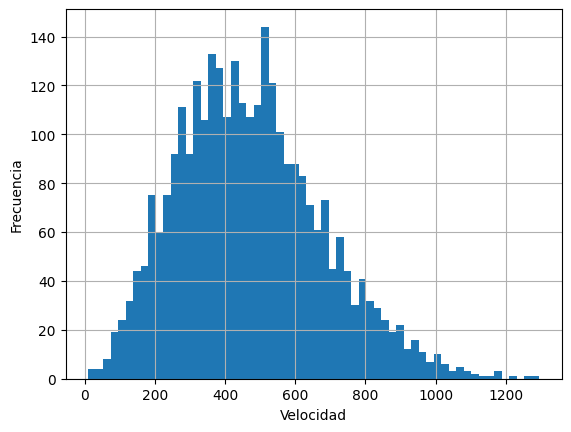

In [144]:
#inciso b: Histograma
ord=data['Velocidad'].sort_values()
ord.hist(bins=60)
plt.xlabel("Velocidad")
plt.ylabel("Frecuencia")
plt.show()

In [145]:
#inciso C
histograma = data['Velocidad'].sort_values().value_counts()
norm = histograma/histograma.sum()
promedio=np.sum(norm.index*norm.values)
promedio

472.17578290610606

In [146]:
#inciso d
m=0.028
k_B=8.31
def Likelihood(v, T, m=0.028, k_B=8.31):
    factor=(m / (2 * np.pi * k_B * T))**(3/2)
    return ( factor *( 4 * np.pi * v**2 )* np.exp(-m * v**2 / (2 * k_B * T)))



In [147]:
#inciso e
hist, bin_edges = np.histogram(data, bins=60, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

def fit_function(v, T):
    return Likelihood(v, T)

popt, pcov = curve_fit(fit_function, bin_centers, hist, p0=[200])
T_fit = popt[0]
T_fit

295.92007184560845

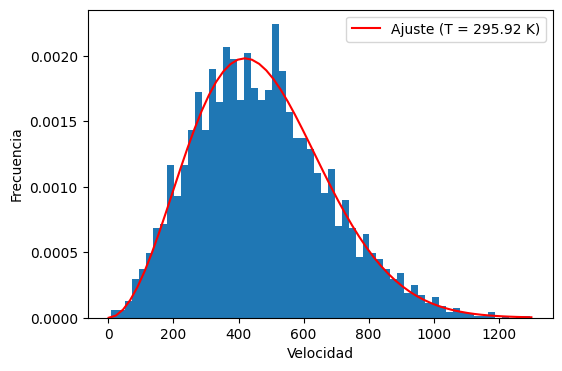

In [148]:
plt.figure(figsize=(6, 4))
plt.hist(data["Velocidad"],bins=60,density=True)
xp=np.linspace(1,1300,60)
plt.plot(xp,Likelihood(xp,T_fit),color='r',label=f"Ajuste (T = {T_fit:.2f} K)")
plt.xlabel("Velocidad")
plt.ylabel("Frecuencia")
plt.legend()

In [149]:
#inciso f
conteos, bordes = np.histogram(data, bins=30)
indice_moda = np.argmax(conteos)
vp = (bordes[indice_moda] + bordes[indice_moda + 1]) / 2
vp

373.8888565001696

In [150]:
#inciso g
vm= (2/np.sqrt(np.pi))*vp
vm

#El valor empírico fue de 471, lo cual esta relativamente cercano al valor con el ajuste, sim embargo la diferencia puede deberse a que la distribución supone un gas ideal,
#isotrópico y sin interacciones moleculares significativas. Si los datos empíricos provienen de un sistema que se desvía de estas condiciones,
# las diferencias entre el modelo y la realidad pueden ser más marcadas.

421.888396483955

In [151]:
v_rms = np.sqrt(np.mean(data["Velocidad"]**2))
v_rms

515.0065658961344

In [152]:
def LogPrior(T):
    if 200 < T < 400:
        return 0.0
    else:
        return -np.inf

In [153]:
def LogLikelihood(T, v_data):
    model = Likelihood(v_data, T)
    if np.any(model <= 0):
        return -np.inf
    return np.sum(np.log(model))

In [154]:
def LogPosterior(T, v_data):
    LogP = LogPrior(T)
    if not np.isfinite(LogP):
        return -np.inf
    return LogP + LogLikelihood(T, v_data)

In [155]:
n_walkers = 10
n_params = 1
p0 = np.random.uniform(200, 400, size=(n_walkers, n_params))

In [156]:
sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(data["Velocidad"],))
pos, prob, state = sampler.run_mcmc(p0, 10000, progress=True)
samples = sampler.get_chain(flat=True)  # Aplanar la cadena
T_samples = samples[:, 0]

100%|██████████| 10000/10000 [02:17<00:00, 72.62it/s]


In [158]:
T_mean = np.mean(T_samples)
T_std = np.std(T_samples)
T_lower = np.percentile(T_samples, 2.5)
T_upper = np.percentile(T_samples, 97.5)

print(f"Media de T: {T_mean:.2f} K")
print(f"Desviación estándar de T: {T_std:.2f} K")
print(f"Intervalo de confianza 95%: [{T_lower:.2f}, {T_upper:.2f}] K")

Media de T: 298.05 K
Desviación estándar de T: 4.74 K
Intervalo de confianza 95%: [289.22, 306.98] K


#Problema 10: Higgs boson discovery


Imagine que se encuentra en el laboratorio CERN y está colaborando en el descubrimiento de una nueva partícula. Una de sus tareas es realizar la estimación de parámetros de la nueva partícula, la cuál está caracterizada por su masa y su ancho. Para realizar esta tarea se sugiere la siguiente estrategía:


a. Descargue los datos de la masa invariante de dos fotones Higgs dataset.  Estamos estudiando el canal de Higgs a dos fotones (H→γγ)

In [160]:
file = '/content/drive/MyDrive/Colab Notebooks/Datos/HiggsFitting.csv'
file

'/content/drive/MyDrive/Colab Notebooks/Datos/HiggsFitting.csv'

In [161]:
data = pd.read_csv(file,sep=',')
data.keys()

Index(['Higgs'], dtype='object')

In [162]:
X = data['Higgs']

b. Dibuje la distribución de frecuencia de los datos entre 100 y 160 GeV, en 30 bines. El dibujo debería tener la barra de error del histograma.

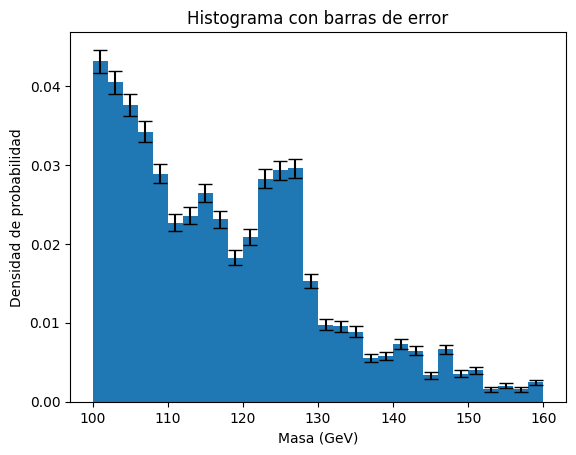

In [163]:
m = np.linspace(100, 160, 31)

# Calcular el histograma con normalización
prob, bin_edges = np.histogram(X, bins=m, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calcular el error estándar para cada bin:
bin_width = bin_edges[1] - bin_edges[0]
errors = np.sqrt(prob * bin_width)

# Graficar el histograma con barras de error
plt.bar(bin_centers, prob, width=bin_width)
plt.errorbar(bin_centers, prob, yerr=0.005*errors, fmt='none', color='black', capsize=5)

plt.xlabel('Masa (GeV)')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma con barras de error')
plt.show()

c. Defina el modelo para la hipótesis nula, es decir el escenario donde no existe el bosón de Higgs.

In [164]:
def Modelo_Nula(a,x):
    return (1/a)*np.exp(-(x-100)/a)

d. Defina la función de minimizar, en este caso es el negativo de la función conjunta de verosimilud

In [165]:
def Likelihood_Nula(a,x):
    return -1*(np.sum(np.log(Modelo_Nula(a,x))))

e. Use el paquete optimize para encontrar el parámetro de la hipótesis nula. Use el siguiente límite del parámetro: bounds =((0,50),).

In [166]:
x0=np.array([10.])
result_nulo = spo.minimize(Likelihood_Nula, x0, args=(X), bounds=((0,50),))
a_nula = result_nulo.x[0]
a_nula

17.61888053628762

In [167]:
X_Nula = np.linspace(100,160,2250)

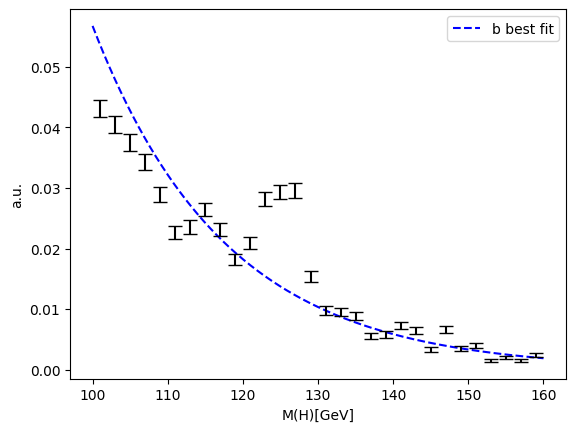

In [168]:
plt.plot(X_Nula,Modelo_Nula(a_nula,X_Nula),linestyle='--', color='blue', label='b best fit')
plt.errorbar(bin_centers, prob, yerr=0.005*errors, fmt='none', color='black', capsize=5)
plt.xlabel('M(H)[GeV]')
plt.ylabel('a.u.')
plt.legend()
plt.show()

g. Defina el modelo para la hipótesis alternativa, es decir el escenario donde si existe el bosón de Higgs

In [169]:
def Modelo_Alt(params,x):
    A,mu,sigma,a = params
    return (A)*(1/np.sqrt(2*np.pi*(sigma)**2))*np.exp(-(x-mu)**2/(2*sigma**2))+(1-A)*(1/a)*np.exp(-(x-100)/a)

h. Defina la función de minimizar, en este caso es el negativo de la función conjunta de verosimilud

In [184]:
def Likelihood_Alt(params,x):
    return -1*np.sum(np.log(Modelo_Alt(params,x)))

i. Use el paquete optimize para encontrar el parámetro de la hipótesis alternativa. Use el siguiente límite del parámetro: bounds = ( (0,1),(50,500),(1,100), (1,100))

In [171]:
x0=np.array([0.14,120.,1.,10.]) #Se usa un valor cercano dado que, si no, converge a otros valores
result = spo.minimize(Likelihood_Alt, x0, args=(X), bounds = [(0, 1), (50, 500), (1, 100), (1, 100)])
a_alt = result.x
a_alt

array([  0.14211058, 125.19823581,   2.77539021,  16.36332131])

j. Encuentre el mejor ajuste de la hipótesis alternativa y dibuje ambos ajustes:

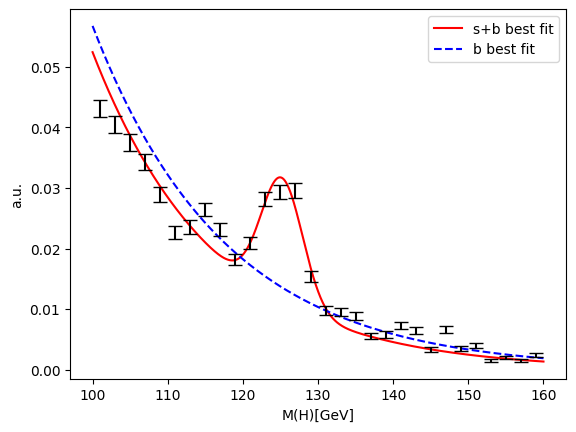

In [172]:
Y_Alt = Modelo_Alt(a_alt,X_Nula)
plt.plot(X_Nula,Y_Alt, color = 'r', label = 's+b best fit')
plt.plot(X_Nula,Modelo_Nula(a_nula,X_Nula),linestyle='--', color='blue', label='b best fit')
plt.errorbar(bin_centers, prob, yerr=0.005*errors, fmt='none', color='black', capsize=5)
plt.xlabel('M(H)[GeV]')
plt.ylabel('a.u.')
plt.legend()
plt.show()

k. ¿Cuál es el valor de las constantes físicas?

In [173]:
A,mu,sigma,a = a_alt

print("El valor de A es: {}".format(A))
print("El valor de mu es: {}".format(mu))
print("El valor de sigma es: {}".format(sigma))
print("El valor de a es: {}".format(a))

El valor de A es: 0.14211057824274945
El valor de mu es: 125.19823581388953
El valor de sigma es: 2.77539020584632
El valor de a es: 16.363321307160984


i. Estime el número de desviaciones estándar entre la observación y la hipótesis nula

In [174]:
n_sigma = np.sqrt(2*(Likelihood_Alt(a_alt, X_Nula) - Likelihood_Nula(a_nula,X_Nula)))
n_sigma

17.71455883647618

m. Con el valor de σ, encuentre el tiempo de vida de la partícula

In [175]:
tiempo_de_vida = (6.626e-34)/(sigma*(1.6022e-10)) #El valor de h en julios es 6.626e-34 J*s
tiempo_de_vida

1.4900836615112446e-24

n. Ahora debe calcular los errores en la estimación del modelo con bosón de Higgs. Para esto vamos a usar el paquete emceepara encontrar la distribución posterior marginal. Use las funciones de verosimilitud mostradas en los incisos anteriores y defina una distribución prior:

In [176]:
!pip install emcee
!pip install corner

In [177]:
import emcee
import corner

In [178]:
def JointLikelihood(p,x):
  return +np.sum(np.log(Modelo_Alt(p,x)))

In [179]:
def LogPrior(p):
    A, mu, sigma, alpha = p
    if 0. < A < 1. and  100. <= mu <= 300. and 0.1 <= sigma <= 20. and 1 <= alpha <= 50:
        return 0.
    else:
        return -np.inf

In [180]:
def LogPosterior(p,x):
  LogP = LogPrior(p)
  if not np.isfinite(LogP):
    return -np.inf
  else:
    return LogP + JointLikelihood(p,x)

In [193]:
n_walkers, n_params = 20,4
p0 = np.zeros((n_walkers, n_params))
p0[:, 0] = np.random.uniform(0., 1., n_walkers)       # A
p0[:, 1] = np.random.uniform(100., 150., n_walkers)   # mu
p0[:, 2] = np.random.uniform(0.1, 8., n_walkers)     # sigma
p0[:, 3] = np.random.uniform(1., 20., n_walkers)      #a

In [195]:
sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(X_Nula,))
pos,prob,state = sampler.run_mcmc(p0,10000,progress=True)

100%|██████████| 10000/10000 [00:28<00:00, 345.49it/s]


O. Genere el muestreo de la distribución posterior.

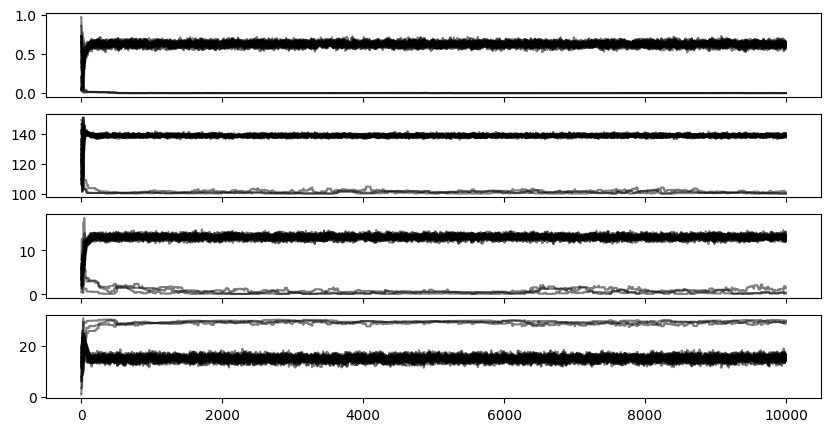

In [196]:
fig, axes = plt.subplots(4, figsize=(10,5), sharex=True)

samples = sampler.get_chain()
labels = ['A','mu','sigma','a']
for i in range(4):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.5)

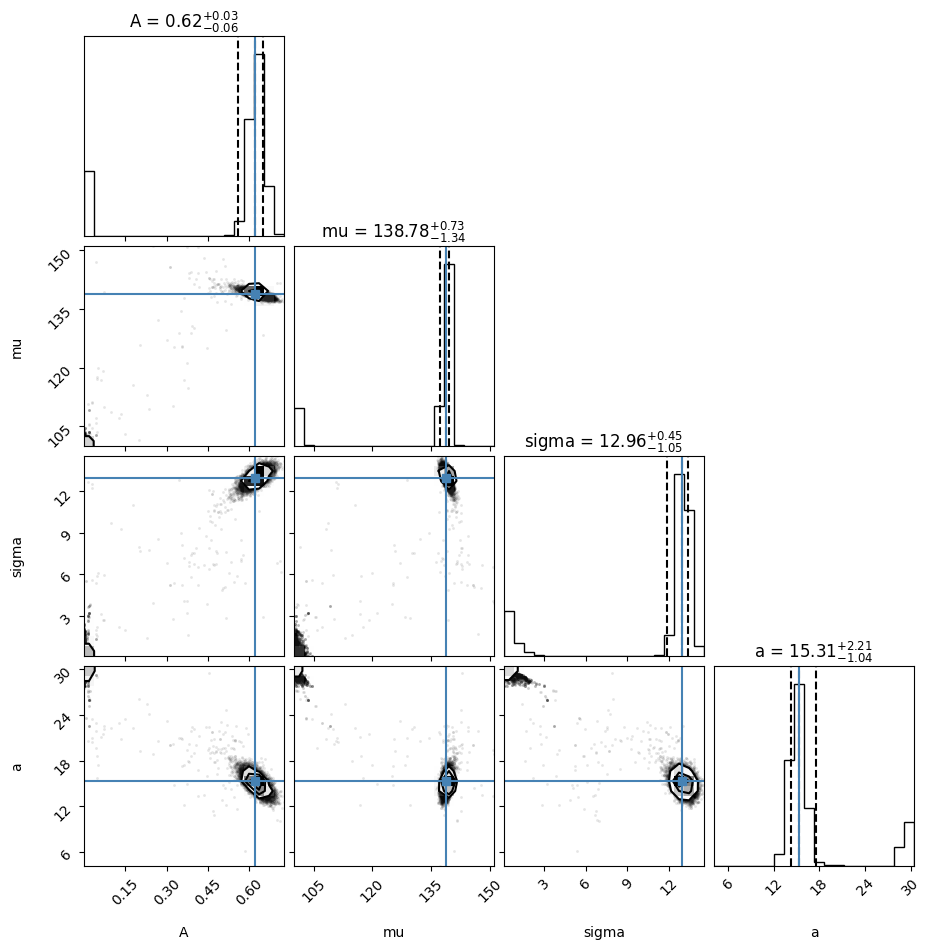

In [197]:
flat_samples = sampler.get_chain(thin=10, flat=True)
truths = np.percentile(flat_samples, 50, axis=0)
figure = corner.corner(flat_samples, labels=labels, truths=truths, quantiles=[0.16, 0.5, 0.84], show_titles=True)

p. ¿Cuál es error porcentual de la estimación de la masa de esta partícula?

In [198]:
#Tenga en cuenta que mu es el valor de la masa
mu_metropolis = np.mean(flat_samples[:, 1])

mu_real = 125.11

def error_porcentual(valor_real, valor_estimado):
    error = abs((valor_estimado - valor_real) / valor_real) * 100
    return error

error_porcentual(mu_real,mu_metropolis)

6.488779753711895

#Problema 4: Tiempo de escape de un fotón del sol

In [253]:
from html import escape
#inciso a
def caminatas(pasos,R,lc):
  escape=[]
  for i in range(pasos):
    x,y,z=0.,0.,0.
    pasos=0
    while np.sqrt(x**2+y**2+z**2)<=R:
      phi=np.random.uniform(0,2*np.pi)
      theta=np.random.uniform(0,np.pi)
      x+=lc*np.sin(theta)*np.cos(phi)
      y+=lc*np.sin(theta)*np.sin(phi)
      z+=lc*np.cos(theta)
      pasos+=1
    escape.append(pasos)
  return escape

escape = caminatas(1000,1,0.1)
escape

[141,
 224,
 64,
 183,
 180,
 62,
 294,
 208,
 65,
 76,
 44,
 116,
 83,
 94,
 116,
 120,
 124,
 78,
 146,
 101,
 167,
 131,
 91,
 78,
 301,
 22,
 32,
 231,
 144,
 101,
 85,
 110,
 63,
 154,
 196,
 254,
 103,
 170,
 55,
 39,
 291,
 58,
 114,
 135,
 54,
 57,
 93,
 49,
 119,
 126,
 86,
 89,
 118,
 60,
 241,
 151,
 44,
 36,
 51,
 26,
 43,
 80,
 64,
 129,
 73,
 43,
 44,
 89,
 76,
 173,
 177,
 68,
 41,
 93,
 64,
 97,
 124,
 105,
 59,
 67,
 72,
 186,
 90,
 39,
 65,
 123,
 70,
 43,
 40,
 102,
 87,
 41,
 267,
 45,
 78,
 173,
 248,
 149,
 64,
 413,
 111,
 175,
 53,
 133,
 73,
 102,
 161,
 65,
 50,
 87,
 73,
 262,
 193,
 139,
 81,
 146,
 75,
 177,
 72,
 273,
 76,
 164,
 213,
 133,
 48,
 79,
 78,
 24,
 61,
 63,
 27,
 213,
 46,
 137,
 45,
 58,
 65,
 45,
 304,
 217,
 226,
 193,
 59,
 101,
 220,
 55,
 61,
 135,
 106,
 84,
 114,
 59,
 94,
 208,
 91,
 112,
 171,
 105,
 94,
 119,
 64,
 120,
 119,
 41,
 122,
 64,
 148,
 103,
 36,
 103,
 168,
 55,
 68,
 61,
 68,
 88,
 112,
 78,
 46,
 170,
 270,
 89,
 100,

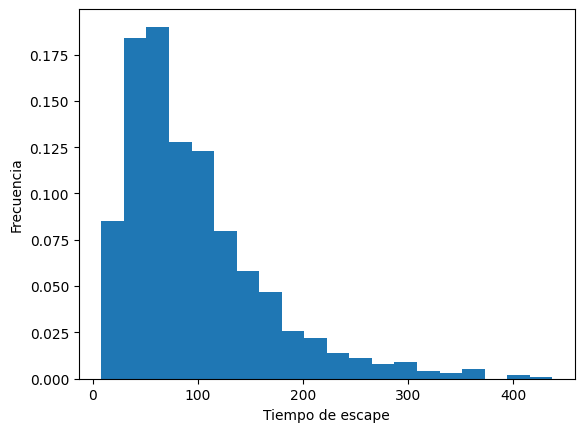

In [254]:
#incisos b, c y d
hist, bin_edges = np.histogram(escape, bins=20, density=True)
norm= hist/hist.sum()
w = np.diff(bin_edges)
plt.bar(bin_edges[:-1], norm, width=w)
plt.xlabel("Tiempo de escape")
plt.ylabel("Frecuencia")
plt.show()

In [255]:
#inciso e
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
expected_value = np.sum(hist * bin_centers * np.diff(bin_edges))
expected_value

107.65285

In [256]:
#inciso f
promedio=np.sum(bin_edges[:-1]*norm)
promedio

#El valor teórico es 100, por lo tanto, coincide en parte con el valor esperado

96.92785

In [252]:
#inciso g
Rsol= 700000
Lc= 0.6
escapereal=caminatas(1000,Rsol,Lc)
hist1, bin_edges1 = np.histogram(escapereal, bins=20, density=True)
norm1= hist1/hist1.sum()
promedio1=np.sum(bin_edges1[:-1]*norm1)
promedio1

#Un fotón puede tardar alrededor de 100 000 años en abandonar el Sol.

KeyboardInterrupt: 

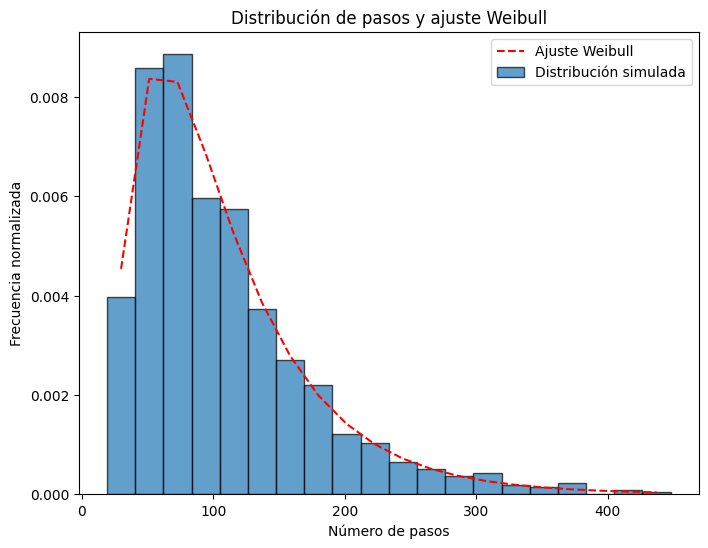

In [257]:
#inciso h
a, c, d, e = exponweib.fit(escape)  # Ajuste con Weibull
weibull_pdf = exponweib.pdf(bin_centers, a, c, d, e)

plt.figure(figsize=(8, 6))
plt.bar(bin_centers, hist, width=np.diff(bin_edges), edgecolor='black', alpha=0.7, label="Distribución simulada")
plt.plot(bin_centers, weibull_pdf, 'r--', label="Ajuste Weibull")
plt.xlabel("Número de pasos")
plt.ylabel("Frecuencia normalizada")
plt.title("Distribución de pasos y ajuste Weibull")
plt.legend()
plt.show()
